In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df_qt = pd.read_json("./ql_toy1_v2_comp_gen.json")
df_qt_2 =pd.read_json("./scenario2_v2_comp_gen.json")
df_dqn = pd.read_json("./dqn_toy1_comp_gen_comp_gen.json")
df_lq =pd.read_json("./linear_toy1_v1_comp_gen.json")

gData = lambda df, cat: {
    'Q-Table': df['Q'][cat],
    #'DQN': df_dqn['DQN'][cat],
    'Heuristic': df['heuristic'][cat],
    'Random': df['random'][cat],
    'No Action': df['no_action'][cat],
}

qData = lambda df,df_dqn,df_l, cat: {
    'Q-Table': df['Q'][cat],
    'Linear Q-Function': df_l['LQ'][cat],
    'DQN': df_dqn['DQN'][cat],
    'Heuristic': df['heuristic'][cat],
    'Random': df['random'][cat],
    'No Action': df['no_action'][cat],
}



In [15]:
df_lq

,LQ
rewards,"[-1032.0, -1084.0, -1046.0, -734.0, -1066.0, -..."
completed,"[41.0, 41.0, 40.0, 53.0, 39.0, 40.0, 57.0, 31...."
dropped,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
man_det,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
invalid,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
invalid_time,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


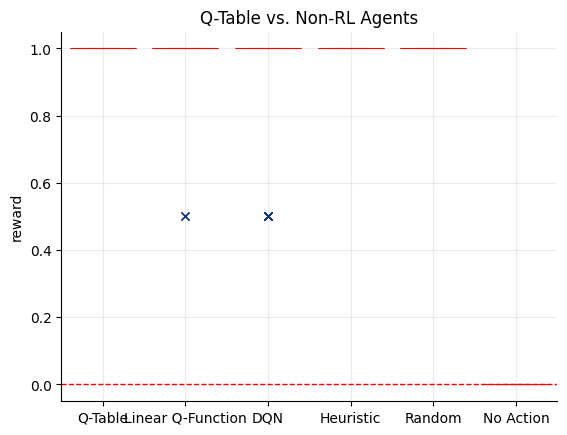

In [17]:

# Plotting multiple boxplots on the same axis
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(qData(df_qt, df_dqn,df_lq ,"man_det")),color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"},medianprops={"color": "r"},)
sns.despine()
plt.title("Q-Table vs. Non-RL Agents")
plt.ylabel("reward")
plt.grid(alpha=.25)
plt.show()

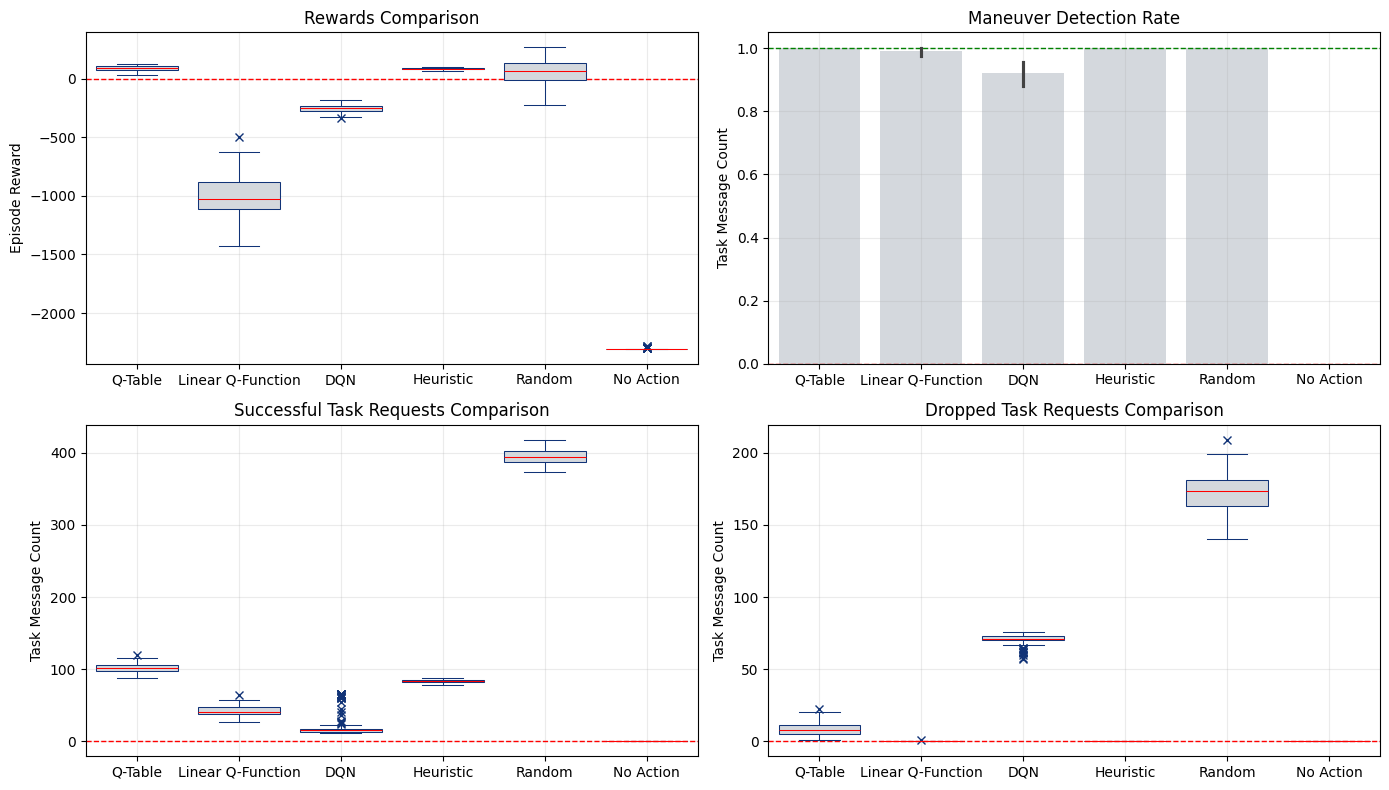

In [23]:
# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 8))  # 2 rows, 2 columns

# Plot each boxplot on a different subplot

# First subplot (top-left)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(qData(df_qt, df_dqn, df_lq, "rewards")), color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"}, medianprops={"color": "r"}, ax=axes[0, 0])
axes[0, 0].set_title('Rewards Comparison')
axes[0, 0].grid(alpha=.25)
axes[0, 0].set_ylabel('Episode Reward')

# Second subplot (top-right)
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(qData(df_qt, df_dqn, df_lq, "completed")), color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"}, medianprops={"color": "r"}, ax=axes[1, 0])
axes[1, 0].set_title('Successful Task Requests Comparison')
axes[1, 0].grid(alpha=.25)
axes[1, 0].set_ylabel('Task Message Count')

# Third subplot (bottom-left)
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(qData(df_qt, df_dqn, df_lq, "dropped")), color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"}, medianprops={"color": "r"}, ax=axes[1, 1])
axes[1, 1].set_title('Dropped Task Requests Comparison')
axes[1, 1].grid(alpha=.25)
axes[1, 1].set_ylabel('Task Message Count')

# Fourth subplot (bottom-right) - if you want to leave it empty or add another plot
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=1)
axes[0, 1].axhline(y=1, color='g', linestyle='--', linewidth=1)
sns.barplot(data=pd.DataFrame(qData(df_qt, df_dqn, df_lq, "man_det")), color="#D3D8DE", linewidth=2, ax=axes[0, 1])
axes[0, 1].set_title('Maneuver Detection Rate')
axes[0, 1].grid(alpha=.25)
axes[0, 1].set_ylabel('Task Message Count')

# Adjust spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()


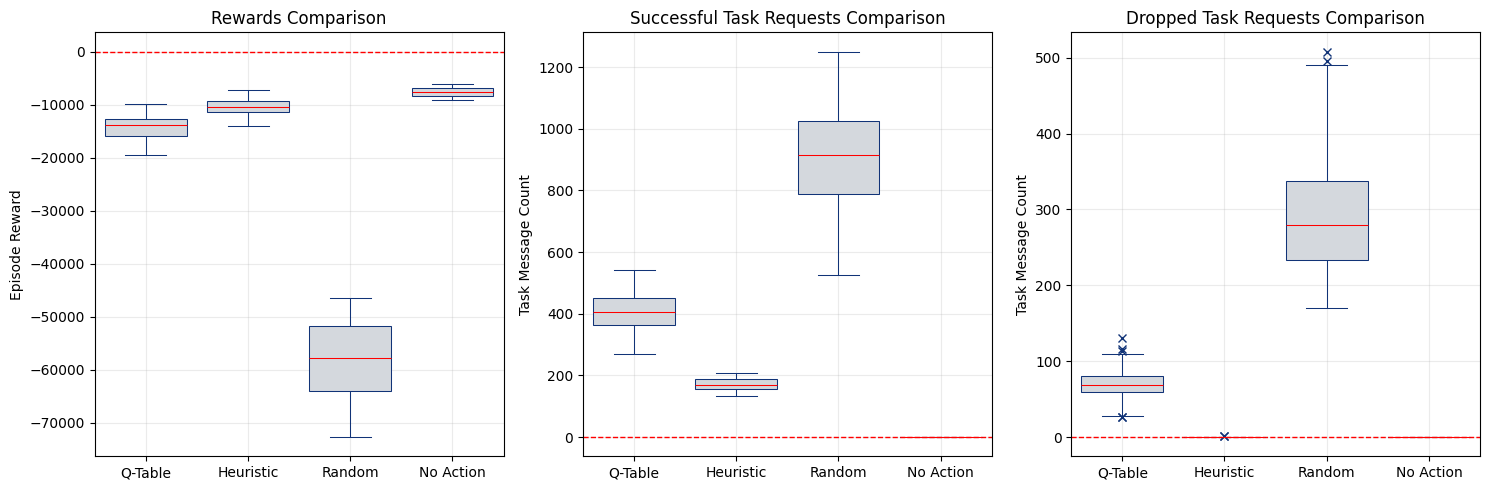

In [12]:

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot each boxplot on a different subplot

axes[0].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(gData(df_qt_2,"rewards")),color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"},medianprops={"color": "r"}, ax=axes[0])
axes[0].set_title('Rewards Comparison')
axes[0].grid(alpha=.25)
axes[0].set_ylabel('Episode Reward')


axes[1].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(gData(df_qt_2,"completed")),color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"},medianprops={"color": "r"}, ax=axes[1])
axes[1].set_title('Successful Task Requests Comparison')
axes[1].grid(alpha=.25)
axes[1].set_ylabel('Task Message Count')


axes[2].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(gData(df_qt_2,"dropped")),color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"},medianprops={"color": "r"}, ax=axes[2])
axes[2].set_title('Dropped Task Requests Comparison')
axes[2].grid(alpha=.25)
axes[2].set_ylabel('Task Message Count')



# Remove the spines around each plot


# Adjust spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()